#Homework 2 - Optimization Methods 
Sudarut Kasemsuk

---









#Question 1
(2 pts)
Find minimum (i.e. both the point $x^*$ and the function value $f^* = f(x^*)$) of function with respect to parameters $a, b, c:$ 
$$
f(x) = ax^2 + bx + c
$$

Solution: \\
First deriverative, 
\begin{split}
  f(x) &= ax^2 + bx + c \\
  f^{'}(x) &= 2ax + b \\
  f^{'}(x^*) &= f^{'}(x) = 0 \\
  x^* &= \frac{-b}{2a}
\end{split}
Second deiverative,
$$ f^{''}(x) = 2a $$

Since $ f^{''}(x) > 0, 2a > 0$ then $ a > 0$ 
So that
$$
(x^*, f(x^*)) = (\frac{-b}{2a}, c-\ \frac{b^2}{4a}), \forall > 0
$$

---


#Question 2
(1 pts)
What are dimensions of gredient of a function $h(x) = f(Ax),$ constructed of function $f: \mathbb{R}^m \rightarrow \mathbb{R}$ and matrix $A \in \mathbb{R}^{m,k} $ ?

Answer: \\
$\nabla h(x)= ( \nabla f(Ax)A)^{T} = A^{T} \nabla f(Ax)$ \\
So, the demension is $(k, 1)$

---

#Question 3
(3 pts)
Derrive Hessian matrix $ \nabla^{2}_{x} f(x) $ for the function $ f(x) = g(Ax+b),$ assuming differentiable $g : \mathbb{R}^{m} \rightarrow \mathbb{R},$ with dimensions $A \in \mathbb{R}^{m \times n}; b \in \mathbb{R}^{m}; x \in \mathbb{R}^{n}$

Solution: \\
First derivative
$$
f^{'}(x) = g^{'}(Ax+b)A
$$
Then the gradient is
$$
\nabla f(x) = A^{T} \nabla g(Ax+b)
$$

Second derivative \\
Derivative function by the chain rule, then Hessian matrix is
$$
\nabla^{2}f(x) = A^{T}\nabla^{2}g(Ax+b)A
$$

---

#Question 4
(3 pts)
Solve an optimal step size problem for the quadratic function, with symmetric positive definite matrix $A \succ 0 \in \mathbb{R}^{n \times n},$ and $ x, b, d \in \mathbb{R}^{n}.$ Your goal is to find optimal $\gamma^*$ for given $A, b, d, x$. The resulting expression must be written in terms of inner products (...,...) 
$$
f(\gamma) = (A(x+ \gamma d), x+\gamma d)+(b, x + \gamma d) \rightarrow \min_{\gamma \in \mathbb{R}}
$$

Soluion: \\
Reformulate,
\begin{split}
  f(\gamma) &= (A(x+\gamma d), x+\gamma d) + (b, x + \gamma d) \rightarrow min_{\gamma \in \mathbb{R}} \\
  &= (A(x + \gamma d),x) + (A(x + \gamma d), \gamma d) + (b, x) + (b, \gamma d) \\
  &= (Ax, x) + (A\gamma d, x) + (Ax, \gamma d) + (A\gamma d, \gamma d) + (b, x) + (b, \gamma d) \\
  &= (Ax, x) + \gamma (Ad, x) + \gamma (Ax, d) + \gamma^2 (Ad, d) + (b, x) + \gamma(b, d) \\
  &= \gamma^2(Ad, d) + \gamma ((Ad, x)+(Ax, d)+(b,d)) + (Ax, x) + (b, x)
\end{split}
from above the first derivative is,
\begin{split}
  f^{'}(\gamma^*) &= 2\gamma (Ad,d) + (Ad, x)+(Ax, d)+(b,d) \\
  &= 2\gamma(Ad, d) + (Ax, d) + (b, d) 
\end{split}
Since $A$ is symetric metrix \\
We know that $f^{'}(\gamma^*) = 0$, \\
$$
\gamma^* = \frac{-(2(Ax, d) + (b, d))}{2(Ad, d)}
$$

---

#Question 5
(3 pts)
Derive subgradient (subdifferential) for the function $f(x) = [x^2 - 1]_{+}, x \in \mathbb{R}.$ (Do not write the subgradient method.)

Consider function at point -1, 1 
$$
\text{Subgradient of  } f(x) = 
\begin{cases} 
  2x  & \text{if }x > 1, x< -1 \\
  0   & \text{if }x > -1 \text{ and } x < 1 \\
  [-2,0] & \text{if } x = -1 \\
  [0, 2] & \text{if } x = 1
\end{cases}
$$

---

#Question 6 
(5 pts)
Find the minimizer of 
$$
f(x, y) = x^2 + xy + 10y^2 - 22y - 5x
$$
numerically by steepest descent.
1. For each iteration, record the values of $x,y$ and f and include in a table.



Note: \\
Steepest Descent Method: choose $\alpha_k$ such that
$$
\alpha_k = \arg \min_{\alpha \geq 0 } {f(x^k + \alpha g^k)}
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

import warnings
warnings.filterwarnings("ignore")

In [2]:
def func(a):
  return (a[0]**2) + (a[0]*a[1]) + (10*(a[1]**2)) - (22*a[1]) - (5*a[0])

def grad(point):
  dx = 2*point[0] + point[1] -5 
  dy = point[0] + 20*point[1] - 22
  return dx, dy

In [3]:
def alpha_cal(alpha, x, grad):
  alpha_new = func(x - alpha*grad)
  return alpha_new

def steepest_descent(alpha, a, tol, cal_alpha = 'yes'):

  epoch = 1000
  ai = []
  f_res = []
  x, y = [], []
  all_alpha = []
  for i in range(epoch):
    a_prev = a
    f = func(a) 
    f_res.append(f)
    ai.append([a,f])
    x.append(a[0])
    y.append(a[1])
    fi = np.array(grad(a)) #calculate sk

    if cal_alpha == 'yes':
      alp = minimize_scalar(alpha_cal, args=(a, fi)) #update alpha
      alpha_opt = alp.x
      all_alpha.append(alpha_opt)

    else:
      alpha_opt = alpha
    
    a = a - np.dot(alpha_opt,fi) #update new point

    if np.abs(func(a) - func(a_prev)) < tol: #stopping criteria
      break

  ai = np.array(ai)
  
  # print(f'last 20 iteration:\n {ai[-20:-1]}\n')
  # print(f'iteration :{i+1}')
  # print(f'the minimum is: {ai[-1, 1]} at point: {ai[-1,0]}')

  return ai, f_res, x, y, all_alpha

In [4]:
#Start point at (10, 4)
a = np.array([10, 4])
all_result, f, x, y, all_alpha  = steepest_descent(alpha=0.5, a=a, tol=0.001, cal_alpha = 'yes')

In [5]:
df = pd.DataFrame(np.array(x), columns = ['x']) 
df['y'] = np.array(y)
df['f'] = np.array(f)

In [6]:
df

,x,y,f
0,10.000000,4.000000,162.000000
1,9.011181,0.461069,32.282583
2,4.170004,1.813751,-2.903327
3,3.901786,0.853815,-12.447522
4,2.588614,1.220730,-15.036389
5,2.515860,0.960347,-15.738620
6,2.159662,1.059873,-15.929101
7,2.139927,0.989244,-15.980768
8,2.043308,1.016241,-15.994783
9,2.037955,0.997082,-15.998585


2. Plot the values on a contour plot.

In [7]:
def contour(f):
  x= np.linspace(-10,15)
  y= np.linspace(-10,15)
  X, Y = np.meshgrid(x, y)
  Z=func([X,Y])
  fig, ax = plt.subplots(figsize=(8, 6))
  CS = ax.contour(X, Y, Z, colors='black')
  ax.set_title("Steepest Descent Method")

Minimum value: -15.999616182972792 
at point: [2.01174741 1.00440528] 
iter: 11


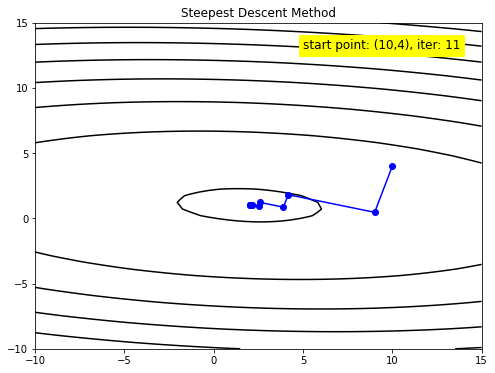

In [8]:
contour(f)
plt.plot(x, y, 'o-', color = 'blue');
plt.text(5, 13, 'start point: (10,4), iter: 11', fontsize = 12, backgroundcolor='yellow');
print(f'Minimum value: {all_result[-1, 1]} \nat point: {all_result[-1,0]} \niter: 11')

3. Explore different starting values, such as (1, 10), (10, 10), (10, 1). Does the numbers of steps depend significantly on the starting guess?

Start point = (1,10) 
x* = 1.9970142923889131, y* = 1.0001606471731188, 
Minimum value = -15.999991307120409, 
iterations = 4

Start point = (10,10) 
x* = 2.014899952412765, y* = 0.9990630873153112, 
Minimum value = -15.99978317331873, 
iterations = 6

Start point = (10,1) 
x* = 2.038833667904213, y* = 0.9911741411738223, 
Minimum value = -15.998055728867538, 
iterations = 22


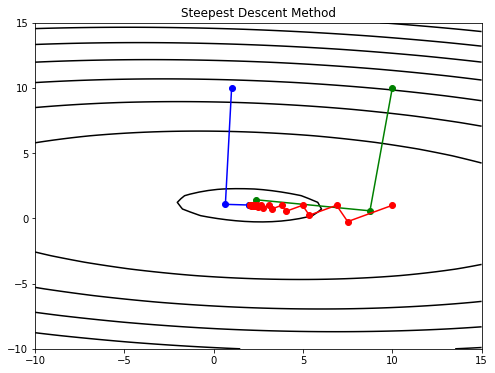

In [9]:
all_result_1, f_1, x_1, y_1, all_alpha_1  = steepest_descent(alpha=0.5, a=np.array([1, 10]), tol=0.001, cal_alpha = 'yes')
all_result_2, f_2, x_2, y_2, all_alpha_2  = steepest_descent(alpha=0.5, a=np.array([10, 10]), tol=0.001, cal_alpha = 'yes')
all_result_3, f_3, x_3, y_3, all_alpha_3  = steepest_descent(alpha=0.5, a=np.array([10, 1]), tol=0.001, cal_alpha = 'yes')

contour(f)
plt.plot(x_1, y_1, 'o-', color = 'blue', label = '(1, 10)');
plt.plot(x_2, y_2, 'o-', color = 'green', label = '(10, 10)');
plt.plot(x_3, y_3, 'o-', color = 'red', label = '(10, 1)');

print(f'Start point = (1,10) \nx* = {x_1[-1]}, y* = {y_1[-1]}, \nMinimum value = {f_1[-1]}, \niterations = {len(all_result_1)}\n')
print(f'Start point = (10,10) \nx* = {x_2[-1]}, y* = {y_2[-1]}, \nMinimum value = {f_2[-1]}, \niterations = {len(all_result_2)}\n')
print(f'Start point = (10,1) \nx* = {x_3[-1]}, y* = {y_3[-1]}, \nMinimum value = {f_3[-1]}, \niterations = {len(all_result_3)}')


From the results, I saw that the number of iteration depends on the starting point we choose. \\
If we choose bad point, it will lead to higher of iteration number.

#Question 7
(9 pts)
Let the cost function of the unconstrained optimization problem of interest be:
$$
f(x) = \frac{1}{4}(x_{1} - 1)^2 + \sum^{n}_{i=2}(2x^{2}_{i-1} - x_{i} - 1)^2
$$
Consider two different scenarios, first $n=3$, and then $n=10$. Recall that the steepest descent algorithm is, 
$$
x^{k+1} = x^{k} - \alpha^{k} \nabla f(x^k), \alpha ^k \in \mathbb{R}_{>0}
$$
1. Using $x^0 = [-1.5,1,...,1]^T$ write out the first iteration of the steepest descent algorithm and obtain the optimum value for $\alpha^0$. \\
What is the value of $x^1$ if you implement $\alpha^0$? Verify that $f(x^1) < f(x^0).$



In [10]:
def func(x):
    first_term = (1/4)*(x[0] - 1)**2 
    second_term = 0
    for i in range(1, len(x)):
        second_term += (2*x[i-1]**2 - x[i] - 1)**2
    return first_term + second_term

def grad(x): 
    grad_list = []
    for i in range(len(x)):
        if i==0:
            grad = (1/2)*(x[i]-1) + 2*(2*x[i]**2 - x[i+1] - 1)*(4*x[i])
            grad_list.append(grad)
        elif i==(len(x)-1):
            grad = 2*(2*x[i-1]**2 - x[i] - 1)*(-1)
            grad_list.append(grad)
        else:
            grad = 2*(2*x[i-1]**2 - x[i] - 1)*(-1) + 2*(2*x[i]**2 - x[i+1] - 1)*(4*x[i])
            grad_list.append(grad)
    return np.array(grad_list)



For n = 3

In [12]:
x0 = np.array([-1.5, 1, 1])
all_result, f, x, y, all_alpha = steepest_descent(alpha=0.5, a=x0, tol=0.001, cal_alpha = 'yes')
print(f'First iteration alpha0 is: {all_alpha[0]}')
print(f'value of x1 is: {x[1]}')
print(f'f(x1): {f[1]}')
print(f'f(x0): {f[0]}')

First iteration alpha0 is: 0.07958148517319277
value of x1 is: 0.9869214116622742
f(x1): 3.8440065206823038
f(x0): 7.8125


So that, $f(x^1) < f(x^0)$

In [13]:
print(f'Optimal value: x* = {x[-1]}\nf(x*) = {f[-1]}')

Optimal value: x* = 1.0058056032756806
f(x*) = 4.674862925315674e-05


For n = 10

In [18]:
x0 = np.array([-1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1])
all_result, f, x, y, all_alpha = steepest_descent(alpha=0.5, a=x0, tol=0.001, cal_alpha = 'yes')
print(f'First iteration alpha0 is: {all_alpha[0]}')
print(f'value of x1 is: {x[1]}')
print(f'f(x1): {f[1]}')
print(f'f(x0): {f[0]}')

First iteration alpha0 is: 0.07958148517319277
value of x1 is: 0.9869214116622742
f(x1): 3.8440065206823038
f(x0): 7.8125


So that, $f(x^1) < f(x^0)$

In [19]:
print(f'Optimal value: x* = {x[-1]}\nf(x*) = {f[-1]}')

Optimal value: x* = 1.0010673494896916
f(x*) = 0.00028893740169630525


2. Write a code to find the minimizer of $f(x)$ using steepest descent algorithm with starting point of $x^0 = [-1.5, 1, ...,1]^T$ and using \\
$\bullet \alpha^k = argmin f(x^k - \alpha \nabla f(x^k))$ \\
$\bullet \text{constant } \alpha = 0.1$ \\
$\bullet \text{constant } \alpha = 0.5$ \\
$\bullet \text{constant } \alpha = 1.0$ (Use $||x^{k+1} - x^k|| \leq 10^{-6}$ as the stopping condition for your algorithm.)


For n = 3

In [14]:
x0 = np.array([-1.5, 1, 1])
all_result, f, x, y, all_alpha = steepest_descent(alpha=0.5, a=x0, tol=0.001, cal_alpha = 'yes')
all_result_1, f_1, x_1, y_1, all_alpha_1 = steepest_descent(alpha=0.1, a=x0, tol=0.001, cal_alpha = 'no')
all_result_2, f_2, x_2, y_2, all_alpha_2 = steepest_descent(alpha=0.5, a=x0, tol=0.001, cal_alpha = 'no')
all_result_3, f_3, x_3, y_3, all_alpha_3 = steepest_descent(alpha=1.0, a=x0, tol=1e-6, cal_alpha = 'no')

In [15]:
print(f'Alpha_agrmin = {all_alpha[0]}, x* = {x[-1]}, f(x*) = {f[-1]}')
print(f'Alpha = {0.1}, x* = {x_1[-1]}, f(x*) = {f_1[-1]}')
print(f'Alpha = {0.5}, x* = {x_2[-1]}, f(x*) = {f_2[-1]}')
print(f'Alpha = {1.0}, x* = {x_3[-1]}, f(x*) = {f_3[-1]}')

Alpha_agrmin = 0.07958148517319277, x* = 1.0058056032756806, f(x*) = 4.674862925315674e-05
Alpha = 0.1, x* = nan, f(x*) = nan
Alpha = 0.5, x* = nan, f(x*) = nan
Alpha = 1.0, x* = nan, f(x*) = nan


For n = 10

In [20]:
x0 = np.array([-1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1])
all_result, f, x, y, all_alpha = steepest_descent(alpha=0.5, a=x0, tol=0.001, cal_alpha = 'yes')
all_result_1, f_1, x_1, y_1, all_alpha_1 = steepest_descent(alpha=0.1, a=x0, tol=0.001, cal_alpha = 'no')
all_result_2, f_2, x_2, y_2, all_alpha_2 = steepest_descent(alpha=0.5, a=x0, tol=0.001, cal_alpha = 'no')
all_result_3, f_3, x_3, y_3, all_alpha_3 = steepest_descent(alpha=1.0, a=x0, tol=1e-6, cal_alpha = 'no')

In [21]:
print(f'Alpha_agrmin = {all_alpha[0]}, x* = {x[-1]}, f(x*) = {f[-1]}')
print(f'Alpha = {0.1}, x* = {x_1[-1]}, f(x*) = {f_1[-1]}')
print(f'Alpha = {0.5}, x* = {x_2[-1]}, f(x*) = {f_2[-1]}')
print(f'Alpha = {1.0}, x* = {x_3[-1]}, f(x*) = {f_3[-1]}')

Alpha_agrmin = 0.07958148517319277, x* = 1.0010673494896916, f(x*) = 0.00028893740169630525
Alpha = 0.1, x* = nan, f(x*) = nan
Alpha = 0.5, x* = nan, f(x*) = nan
Alpha = 1.0, x* = nan, f(x*) = nan


3. How many steps does it take for the algorithm to converge for each choice of the step size above?


For n = 3

In [16]:
print(f'Alpha_argmin = {all_alpha[0]}, iter = {len(all_result)}')
print(f'Alpha = {0.1}, iter = {len(all_result_1)}')
print(f'Alpha = {0.5}, iter = {len(all_result_2)}')
print(f'Alpha = {1.0}, iter = {len(all_result_3)}')

Alpha_argmin = 0.07958148517319277, iter = 5
Alpha = 0.1, iter = 1000
Alpha = 0.5, iter = 1000
Alpha = 1.0, iter = 1000


For n = 10

In [22]:
print(f'Alpha_argmin = {all_alpha[0]}, iter = {len(all_result)}')
print(f'Alpha = {0.1}, iter = {len(all_result_1)}')
print(f'Alpha = {0.5}, iter = {len(all_result_2)}')
print(f'Alpha = {1.0}, iter = {len(all_result_3)}')

Alpha_argmin = 0.07958148517319277, iter = 6
Alpha = 0.1, iter = 1000
Alpha = 0.5, iter = 1000
Alpha = 1.0, iter = 1000


4. Use fiminbnd from Matlab or an equivalent function from the programming language of your choice to solve the problem. How many steps does it take for this algorithm to converge?

For n = 3

In [17]:
from scipy import optimize

x0 = np.array([-1.5, 1, 1])
optimize.fmin(func, x0, xtol = 1e-6, maxiter = 1000)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 333
         Function evaluations: 574


array([0.99999997, 0.99999991, 0.99999964])

For n = 10

In [23]:
x0 = np.array([-1.5, 1, 1, 1, 1, 1, 1, 1, 1, 1])
optimize.fmin(func, x0, xtol = 1e-6, maxiter = 1000)

Optimization terminated successfully.
         Current function value: 0.983032
         Iterations: 564
         Function evaluations: 842


array([-0.96544607,  0.99140734,  0.99786062,  0.99949018,  0.99997128,
        1.00038814,  1.00167797,  1.00674997,  1.02709802,  1.10986217])